# Challenge 16.10

In [1]:
!conda install pandas-profiling -y

Solving environment: done

# All requested packages already installed.



In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Background of Data Set

Source: https://www.kaggle.com/kumarajarshi/life-expectancy-who

About this file
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings
from pandas_profiling import ProfileReport

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Step 1: Load Dataset
'Life expectancy' is our target variable. 

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [5]:
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Step 2: Exploratory Data Analysis - Pre-Processing
Detect the problems with the data such as missing values and outliers. 
a) Are there any nonsense values that seem to be stemmed from the data collection? 
b) For the missing values, discuss which technique would be the most suitable one in filling out these values. 
c) Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [11]:
life_df.shape

(2938, 22)

In [7]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [24]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Column Descriptions 
(Aside from 'Country' and 'status', which are probably categoricol, data types are continuous and integers)

* Country = Country
* Year = Year
* Status= Developed or Developing status
*  Life expectancy = Life Expectancy in age
*  Adult Mortality = Adult Mortality Rates of both sexes (probability of dying between 15& 60 years per 1000 population)
* infant deaths = Number of Infant Deaths per 1000 population
* Alcohol = Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) percentage 
* expenditure = Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B = Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles = Measles - number of reported cases per 1000 population
* BMIAverage =  Body Mass Index of entire population 
* under-five deaths = Number of under-five deaths per 1000 population
* Polio = Polio (Pol3) immunization coverage among 1-year-olds (%)
* Total expenditure = General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria = Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS = Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP = Gross Domestic Product per capita (in USD)
* Population = Population of the country
* thinness 1-19 years = Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness 5-9 years = Prevalence of thinness among children for Age 5 to 9(%)
* Income composition of resources = HDI in terms of income composition of resources (index ranging from 0 to 1)
* Schooling = Number of years of Schooling(years)

#### Observation:
We have 22 columns. We have 2,938 observations, but missing values in several columns. Let's look for unique values.

In [8]:
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

A) Our target variable is Life Expectancy 'Life expectancy '. 
B) We are showing univariate analysis below. We showed multivariate analysis in the profile and again below our correlation using '.corr' function.

## Step 3: Exploratory Data Analysis - Data Munging/Wrangling
Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [28]:
# Pre-prep
# Strip column titles from whitespace
titles = {k:k.replace(k,k.strip()) for k in life_df.columns}
life_df.rename(columns=titles,inplace=True)

In [30]:
#Checking for stripped white space in variables
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [39]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


## Missing Values

In [12]:
#Use function called .isnull() which returns True if an element has no value and otherwise returns (None) 
#or False for each element in a DataFrame.

life_df.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
#Review missing values

print(len(life_df))
life_df.isnull().sum()

2938


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Observations:
We see that our dataset (life_df) seems to be missing from the 'Population', 'Hepatitis B', 'GDP' and 'Total expenditure' columns. If these missing values came from rows where countries have existent values for the year before, or after, that would be ok and imputation would be easy.

We will check what correlates with each of the three columns with most missing values: 'Population', 'Hepatitis B', 'GDP' and 'Total expenditure' columns. 
We will use life expectancy to all variables below in 'Descriptive Statistics'. 

In [14]:
#Calculate magnitude of missing values by calculating the percentages of the missing values in all columns:
life_df.isnull().sum()*100/life_df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

### Observations
*No text data
*Looks like Measles is the most prevalent of diseases (Hepatitis, Polio, Diphtheria, AIDS)
*Hepatitis B is the most "missing value' category (if 20ish% missing, check distribution to see if 'RANDOM'/by accident or regional bias, or other underlying cause 
*

* Missing values for:
Life expectancy                    2928 non-null float64 --only 10 missing values, will skip or REMOVE the 10 rows 
Adult Mortality                    2928 non-null float64 -- same
Alcohol                            2744 non-null float64 --impute mean
Hepatitis B                        2385 non-null float64 --interpolate
 BMI                               2904 non-null float64 --interpolate
 Polio                             2919 non-null float64 --interpolate
Total expenditure                  2712 non-null float64 --impute median(look at profile above for distr of data)
Diphtheria                         2919 non-null float64 --interpolate
GDP                                2490 non-null float64 --impute
Population                         2286 non-null float64 --impute median
 thinness  1-19 years              2904 non-null float64 --impute median
 thinness 5-9 years                2904 non-null float64 --impute median
Income composition of resources    2771 non-null float64 --impute mean
Schooling                          2775 non-null float64 --impute mean

* Don't see any 'True' after running null values test.
* Population correlates with nothing other that infant and under-five deaths significantly. The two can be considered hieararchical since infants are included in under-five deaths and therefore are strongly correlated, and both make a factor of population.
* Hepatitis B correlates with Diphteria, which we can correctly guess are existent in countries that lack resources for public health and are living in bad conditions due to a collection of reasons.

* GDP correlates with Total expenditure, which makes sense since economic production allows public spending through taxes.


In [10]:
life_df[boolean_mask]["Country"].value_counts().index

Index(['Norway', 'United Kingdom of Great Britain and Northern Ireland',
       'Denmark', 'Iceland', 'Japan', 'Switzerland', 'Finland', 'Slovenia',
       'Hungary', 'South Sudan', 'Equatorial Guinea', 'Haiti', 'Somalia',
       'Netherlands', 'Sweden', 'Ireland', 'Namibia', 'Niger',
       'Central African Republic', 'Guinea-Bissau', 'Liberia', 'Timor-Leste',
       'Chad', 'Togo', 'Angola', 'Ethiopia', 'Congo', 'Croatia',
       'Sierra Leone', 'Djibouti', 'Guinea',
       'Democratic Republic of the Congo', 'Cambodia', 'Burkina Faso',
       'Montenegro', 'Chile', 'Nigeria', 'Zambia', 'Guatemala', 'Cameroon',
       'Suriname', 'Sudan', 'The former Yugoslav republic of Macedonia',
       'Gabon', 'Mauritania', 'Senegal', 'Estonia', 'Algeria', 'Burundi',
       'Bosnia and Herzegovina', 'India', 'Serbia', 'Viet Nam',
       'Sao Tome and Principe', 'Myanmar', 'Saint Vincent and the Grenadines',
       'Sri Lanka', 'Mali', 'Pakistan', 'Comoros', 'Peru',
       'Democratic People's Re

In [6]:
ProfileReport(life_df)

Number of variables,22
Number of observations,2938
Total Missing (%),3.9%
Total size in memory,505.1 KiB
Average record size in memory,176.0 B
Numeric,18
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,2


### Observations in Correlating with target variable: "Life Expectancy"
* Schooling, Income composition of resources, Adult Mortality and HIV/AIDS seem to correlate the strongest with with the Life expectancy column, respectively.

* Schooling and Income composition of resources increase with Life Expectancy for countries.

* Adult Mortality, HIV/AIDS have an understandable negative correlation with Life Expectancy.

In [7]:
for column_name in life_df.columns:
    print("Unique values in column {} are: {}".format(column_name, life_df[column_name].unique()))

Unique values in column Country are: ['Afghanistan' 'Albania' 'Algeria' "Côte d'Ivoire" 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Slovakia'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 

In [8]:
boolean_mask = life_df["Hepatitis B"].isnull()
boolean_mask.value_counts()

False    2385
True      553
Name: Hepatitis B, dtype: int64

### Observation: Address Missing Values Challenge by 3 Methods
Fill in missing values by: Imputation or Interpolation How to decide? Fill from rows containing data from the same country but for the previous year. Why? Because a country's values for a given variable are likely to be close when compared for two consecutive years. 

* Imputation by mean for the following variables. 
life_df["Alcohol"].fillna(life_df["Alcohol"].mean(), inplace=True)
life_df["Income composition of resources"].fillna(life_df["Income composition of resources"].mean(), inplace=True)
life_df["Schooling"].fillna(life_df["Schooling"].mean(), inplace=True)
print(life_df['Alcohol'])
print(life_df['Income composition of resources'])
print(life_df[‘Schooling'])

* Imputation by median for 'Population' variable.
life_df["Population"].fillna(life_df["Population"].median(), inplace=True)
print(life_df[‘Population'])

* Interpolate disease variables becaue we are noting intra-regional similarities with certain diseases and vaccination programs: 'Hepatitis B', "Measles ", "Polio", "Diphtheria", ' HIV/AIDS'.

*None of these variables correlates with an unexpected variable or is even in the situation that warrants further exploration as to whether any values are missing at random.


Checking the columns with 0.00 results to see frequencies of categorical values.


In [9]:
life_df["Life expectancy "]

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [10]:
#Country
life_df.Country.value_counts()

Egypt                    16
Saint Lucia              16
Jamaica                  16
Qatar                    16
Liberia                  16
                         ..
Marshall Islands          1
Saint Kitts and Nevis     1
Palau                     1
Dominica                  1
Nauru                     1
Name: Country, Length: 193, dtype: int64

In [11]:
#Year
life_df.Year.value_counts()

2013    193
2015    183
2011    183
2009    183
2007    183
2005    183
2003    183
2001    183
2014    183
2012    183
2010    183
2008    183
2006    183
2004    183
2002    183
2000    183
Name: Year, dtype: int64

In [18]:
#Status
life_df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [12]:
#Measles
life_df['Measles '].value_counts()

0         983
1         104
2          68
3          44
4          33
         ... 
124219      1
1359        1
1361        1
9559        1
4088        1
Name: Measles , Length: 958, dtype: int64

In [14]:
#Disease Diphtheria
life_df['Diphtheria '].value_counts()

99.0    350
98.0    254
97.0    205
96.0    201
95.0    200
       ... 
2.0       1
56.0      1
19.0      1
27.0      1
32.0      1
Name: Diphtheria , Length: 81, dtype: int64

In [31]:
#HIV/AIDS
life_df['HIV/AIDS'].value_counts()

0.1     964
0.3      82
0.2      66
0.4      51
0.5      33
       ... 
21.1      1
28.4      1
6.6       1
13.2      1
7.1       1
Name: HIV/AIDS, Length: 167, dtype: int64

In [35]:
from scipy.interpolate import interp1d
fill_list = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']
for hepatitis in 'Hepatitis B':
    life_df.loc[life_df["Hepatitis B"] == hepatitis, fill_list] = life_df.loc[life_df["Hepatitis B"] == hepatitis, fill_list].interpolate()

# we drop the null values after interpolation
life_df.dropna(inplace=True)
print(life_df['Hepatitis B'])

0       65.0
1       62.0
2       64.0
3       67.0
4       68.0
        ... 
2933    68.0
2934     7.0
2935    73.0
2936    76.0
2937    79.0
Name: Hepatitis B, Length: 1649, dtype: float64


In [36]:
for measle in 'Measles':
    life_df.loc[life_df["Measles"] == measle, fill_list] = life_df.loc[life_df["Measles"] == measle, fill_list].interpolate()

# we drop the null values after interpolation
life_df.dropna(inplace=True)
print(life_df['Measles'])

0       1154
1        492
2        430
3       2787
4       3013
        ... 
2933      31
2934     998
2935     304
2936     529
2937    1483
Name: Measles, Length: 1649, dtype: int64


In [33]:
for p in 'Polio':
    life_df.loc[life_df['Polio'] == p, fill_list] = life_df.loc[life_df['Polio'] == p, fill_list].interpolate()

# we drop the null values after interpolation
life_df.dropna(inplace=True)
print(life_df['Polio'])

0        6.0
1       58.0
2       62.0
3       67.0
4       68.0
        ... 
2933    67.0
2934     7.0
2935    73.0
2936    76.0
2937    78.0
Name: Polio, Length: 1649, dtype: float64


In [37]:
for hiv in 'HIV/AIDS':
    life_df.loc[life_df['HIV/AIDS'] == hiv, fill_list] = life_df.loc[life_df['HIV/AIDS'] == hiv, fill_list].interpolate()

# we drop the null values after interpolation
life_df.dropna(inplace=True)
print(life_df['HIV/AIDS'])

0        0.1
1        0.1
2        0.1
3        0.1
4        0.1
        ... 
2933    33.6
2934    36.7
2935    39.8
2936    42.1
2937    43.5
Name: HIV/AIDS, Length: 1649, dtype: float64


## c) Outliers
Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

We will use Boxplot to detect outliers. 

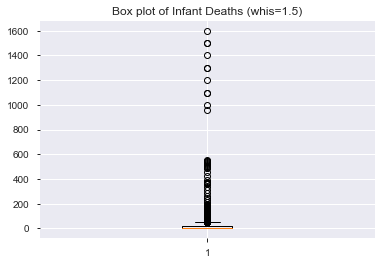

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot(life_df["infant deaths"])
plt.title("Box plot of Infant Deaths (whis=1.5)")
plt.show()

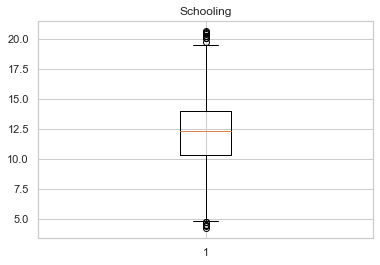

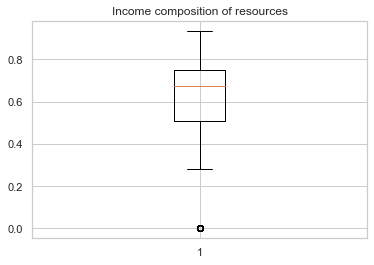

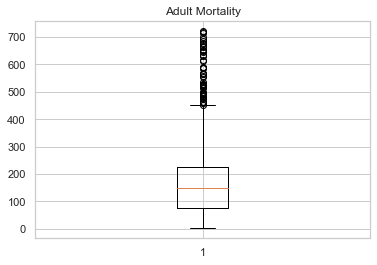

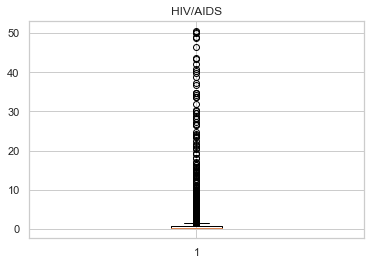

In [38]:
# Plot the orhwe 4 variables
plt.boxplot(life_df['Schooling'])
plt.title('Schooling')
plt.show()
plt.boxplot(life_df['Income composition of resources'])
plt.title('Income composition of resources')
plt.show()
plt.boxplot(life_df['Adult Mortality'])
plt.title('Adult Mortality')
plt.show()
plt.boxplot(life_df['HIV/AIDS'])
plt.title('HIV/AIDS')
plt.show()

In [20]:
## Method IQR

In [37]:

# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
import numpy as np

q75, q25 = np.percentile(life_df["infant deaths"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The death threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_df["infant deaths"] > max_val) 
                      | (life_df["infant deaths"] < min_val))[0]))
    ))

The death threshold is: 1.0
Number of outliers is: 243
The death threshold is: 1.5
Number of outliers is: 199
The death threshold is: 2.0
Number of outliers is: 151
The death threshold is: 2.5
Number of outliers is: 121
The death threshold is: 3.0
Number of outliers is: 101
The death threshold is: 3.5
Number of outliers is: 89
The death threshold is: 4.0
Number of outliers is: 84
The death threshold is: 4.5
Number of outliers is: 80


### Outlier Treatment: 
We have 3 options: 
1) We can drop the outliers from our dataset.
2) We can cap the values of the outliers by assigning them new values.
3) We can transform the outliers into something harmless for our analysis.

In [51]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_infant = winsorize(life_df["infant deaths"], (0, 0.10))

winsorized_infant

masked_array(data=[60, 60, 60, ..., 25, 25, 24],
             mask=False,
       fill_value=999999)

### Multivariate analysis:

In [40]:
life_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


### Visualizing Variables as Potential Features
We will visualize scatterplots between 'Schooling' and 'Income composition of resources' against our target variable.

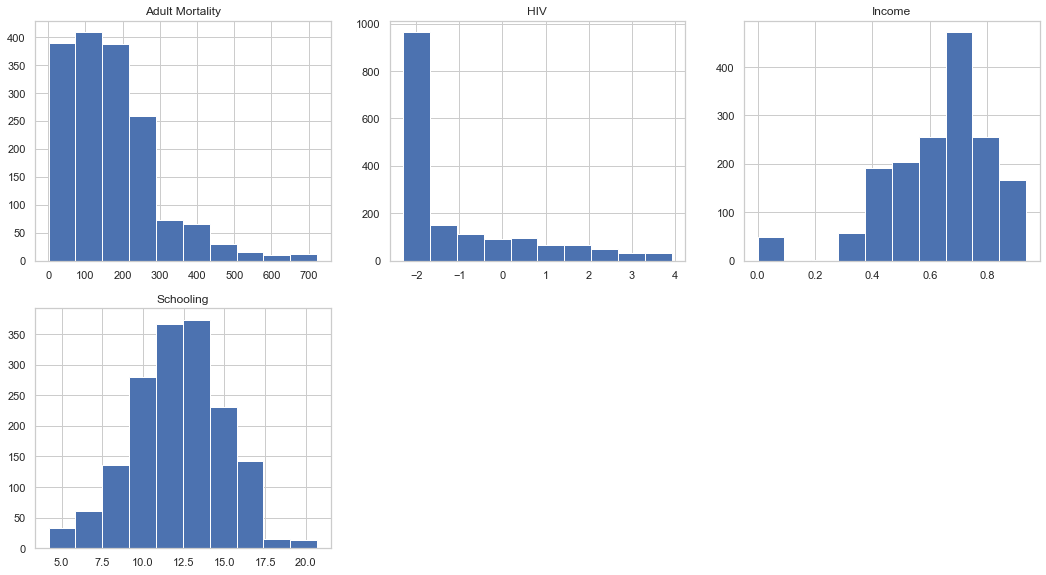

In [39]:
import numpy as np


plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(life_df["Adult Mortality"])
plt.title("Adult Mortality")

plt.subplot(3, 3, 2)
plt.hist(np.log(life_df["HIV/AIDS"]))
plt.title("HIV")

plt.subplot(3, 3, 3)
plt.hist(life_df["Income composition of resources"])
plt.title("Income")

# histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(life_df["Schooling"])
plt.title("Schooling")

plt.show()

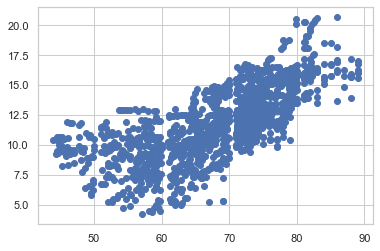

In [40]:
plt.scatter(life_df['Life expectancy'] ,life_df['Schooling'], )
plt.show()

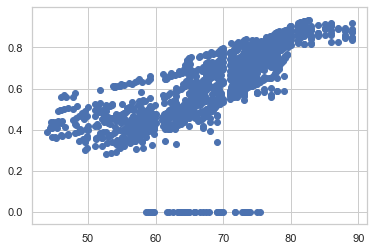

In [41]:
plt.scatter(life_df['Life expectancy'] ,life_df['Income composition of resources'], )
plt.show()

## Step 4: Exploratory Data Analysis - Feature Engineering
In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* After multivariate analysis, we will select the following that we think are relevant to 'Life expectancy': 
* Variables: 
1)'Country', 2)'Year', 3)'Status', 4)'Adult Mortality', 5) 'under-five deaths', 6)'Alcohol', 7)'percentage expenditure', 8) 'Hepatitis B',9) 'Measles ', 10)' BMI ', 11)'Polio', 12) 'Total expenditure', 13)'Diphtheria ', ' 14) HIV/AIDS', 15)'GDP', 16)'Population', 17) 'thinness  1-19 years',18) 'Income composition of resources', 19) 'Schooling'.

* Income composition of resources seems to correlate better with Life expectancy. Therefore we will be choosing it instead of the Schooling variable. Any of the two can be chosen because in reality, either of the two can explain the existence of the other.

We see that 'thinness  1-19 years' shows a moderately high correlation with 'BMI' of -.511. We'll keep this variable, but exclude the 'thinness 5-9 years' because it's highly correlated with 'thinness  1-19 years' variable. 

We will select 'under-five deaths' instead of using 'infant deaths'--which we will exclude-- to represent the infant/toddler mortality rates together.


## Feature Engineering - Principal Component Analysis

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Get rid of categorical columns
life_df_pca = life_df.drop(columns=['Country','Status'])
life_df_pca = life_df_pca.replace([np.inf, -np.inf], np.nan).dropna()

# PCA 
X = StandardScaler().fit_transform(life_df_pca.dropna())
sklearn_pca = PCA(n_components=2,svd_solver='full')
Y_sklearn = sklearn_pca.fit_transform(X)

In [55]:
Y_sklearn[:, 0] #pca1
Y_sklearn[:, 1] #pca2

array([ 0.21180361, -0.04760947,  0.14967875, ..., -2.36755519,
       -3.38076397, -2.82302625])

In [56]:
len(sklearn_pca.components_)

2

### PCA1


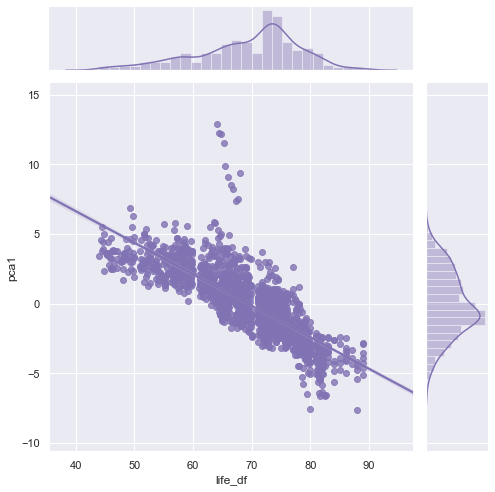

In [58]:

temp_df = pd.DataFrame({'life_df':life_df_pca['Life expectancy'],'pca1':Y_sklearn[:, 0],'pca2':Y_sklearn[:, 1]})
# temp_df
sns.set(style="darkgrid")

g = sns.jointplot('life_df', "pca1", data=temp_df, kind="reg", color="m", height=7)

## PCA2

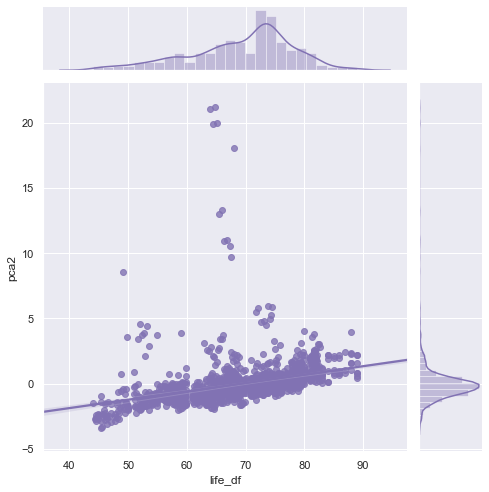

In [59]:
sns.set(style="darkgrid")

g = sns.jointplot('life_df', 'pca2', data= temp_df, kind="reg", color="m", height=7)

### Observations:
The above scatterplot shows a strong correlation between 'pca1' and 'Life expectancy'. For example, if 'pca1' was at 0, our model would guess 'Life expectancy' is between 60 to 70 and can be less.

We see that 'pca2' follows a normal distribution very closely. This makes 'pca2' a variable that is fit for using in prediction models, since many models assume normal distribution of features.
 
Above all, 'pca1' demonstrates more explainability for 'Life expectancy' than other variables that came with the dataset. It would be much more efficient if our 'PCA1' was included in a model instead of the redundant variables: 
* 'thinness 1-19 years' = Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* 'thinness 5-9 years' = Prevalence of thinness among children for Age 5 to 9(%).

### b) Visualing other variables of interest
We are interested in measuring a categorical variable against continous: 'Status' vs. 'percentage expenditure’.

### 1. Categorical with Continuous: "Country Status Versus Percentage of Country's Government Expenditure"

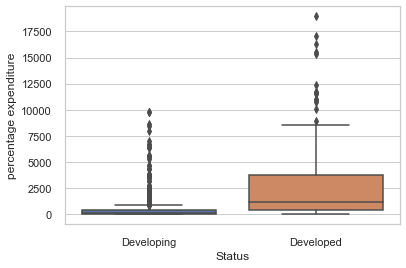

In [41]:
import seaborn as sns
#life_df=data

sns.set(style="whitegrid")
ax = sns.boxplot(x="Status", y="percentage expenditure", data=life_df)

### 2. Continous vs Continous: "Percent of Government Expenditure For Life Expectancy"

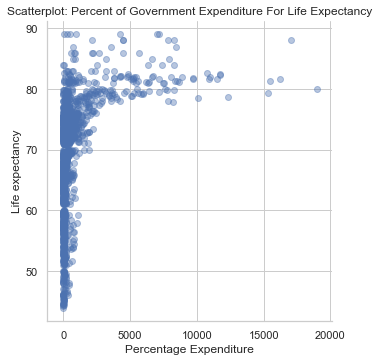

In [50]:
#2 Continous vs Continous
g = sns.lmplot(y='Life expectancy', # Variable 1.
               x='percentage expenditure', # Variable 2.
               data=life_df, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlapping points.
g.set_ylabels("Life expectancy")
g.set_xlabels("Percentage Expenditure")
plt.title('Scatterplot: Percent of Government Expenditure For Life Expectancy')
plt.show()

In [43]:
!conda install -c pyviz hvplot -y

Solving environment: done

# All requested packages already installed.



### 3: Continuous vs. Continuous: "Regression: Life Expectancy with Percentage Expenditure"

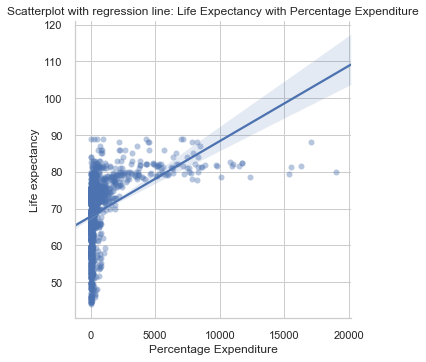

In [44]:
g = sns.lmplot(y='Life expectancy ', 
               x='percentage expenditure',
               data=life_df, # Data
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Life expectancy")
g.set_xlabels("Percentage Expenditure")
plt.title('Scatterplot with regression line: Life Expectancy with Percentage Expenditure')
plt.show()

### 4. Categorical vs. Continuous: "Life Expectancy Per Country"

In [47]:
import hvplot.pandas

In [49]:
#Type 1
life_df.hvplot(kind='scatter', y="Life expectancy", x="Country")

:Scatter   [Country]   (Life expectancy)

In [50]:
#Attempt 2: Switch to 'Y'
life_df.hvplot.box(y="Life expectancy ", by="Country", invert=True, height=1600, width=700)

:BoxWhisker   [Country]   (Life expectancy )

## Step 5: Summarize
a) Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. 
b) Develop visual. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

Resource: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

Summary: 
Overall, the data set presents a robust set of values--most columns included complete values. Although 'Population' presented the most missing values (about 22 percent), and we used the mean value to fill in the missing values, we see that the correlation of 'Population' and 'Life expectancy' is neutral. That being said, we observe four big picture data points. First, we see in Figure 1 that the 'Status' of a country--whether its 'Developing' or 'Developed'--the percentage of expenditure is higher in the latter group.  Second, we see in Figure 2 that 'Life expectancy' increases with the percent of government expenditure on its people's welfare. There's a positive correlation between the two variables of .38.  Third, we see that the diseases ('Alcohol', 'Hepatitis B', 'Measles ','Polio', 'Diphtheria'  and 'HIV/AIDS') show a moderate correlation with 'Life expectancy', or the number of years one lives in a given country. Interestingly enough, 'HIV/AIDS shows the highest correlation of .59 with 'Life expectancy', which is the most modern disease to plague society. 

* As such, we may conclude with certainty that pre-preparation for values can drastically change variable -or features-, therefore improving models by improving their inputs.

* Additionally, hyperparameter optimization can decide on the way these models process inputs, but we are yet to see the magnitude of increase of accuracy with the enhancement of both, and that by itself depends on the model, the algorithm, and the available hyperparameters involved.

* We are curious to see the correlation of Novel COVID-19 in upcoming WHO data. Fourth, we see in Figure 4 (Life Expectancy Per Country) that a 'Developing' country like, Afghanistan or Coite d'oivre, has a lower life expectancy range than the 'Developed' country, like Kuwait or Qatar, which range between 73.2-74.7 and 76.3-78.6 respectively.

* Next time, I would like to break the countries into groups by 'Status' to show the state of development's interaction with 'Life expectancy', or the number of years one lives in a given country.  